In [1]:
import numpy as np
import os
import time
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
img_height = 188
img_width = 140

data_dir = "mini_project_dataset"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 46 files belonging to 2 classes.
Using 37 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 46 files belonging to 2 classes.
Using 9 files for validation.


In [5]:
#data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomContrast(0.1)])

#train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

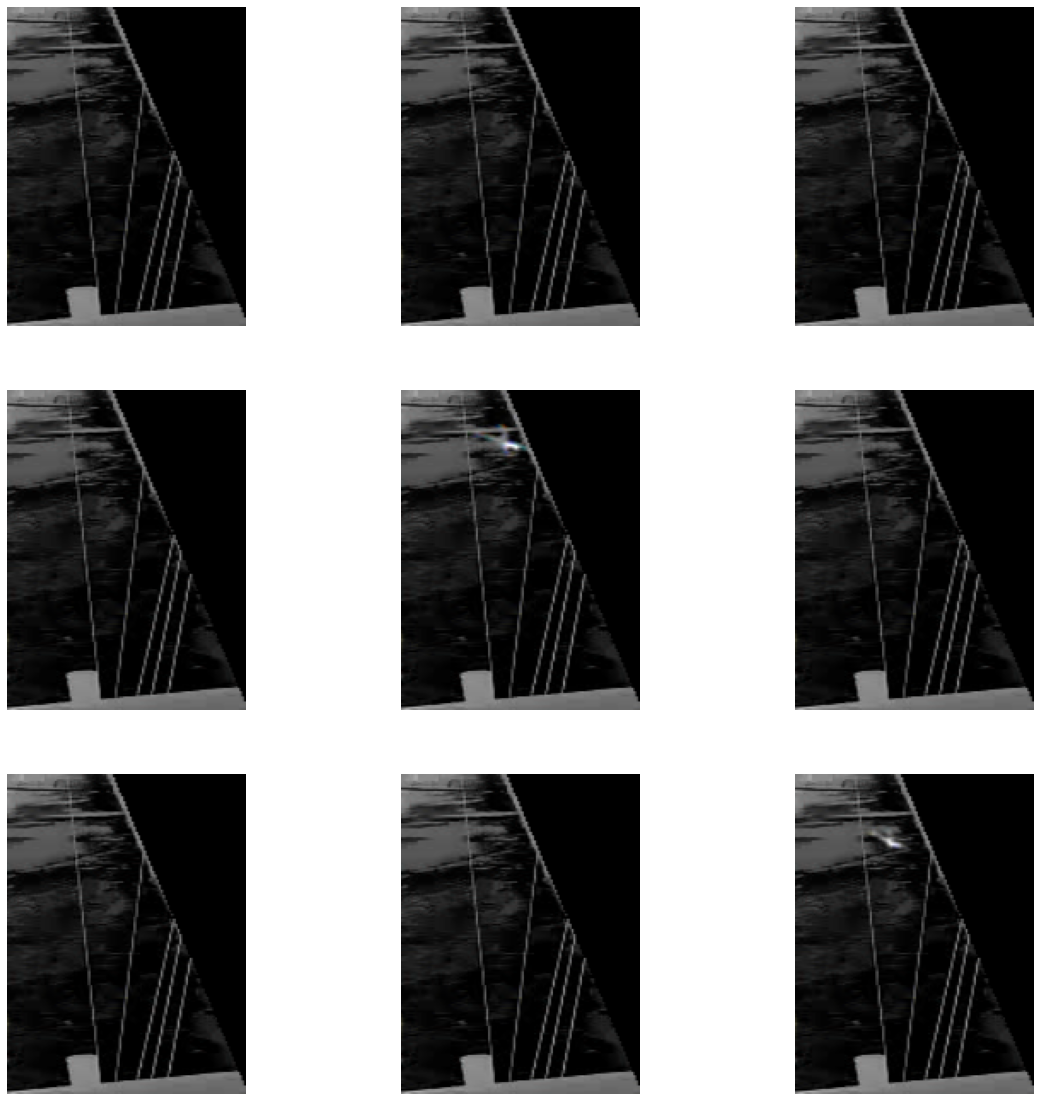

In [6]:
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [11]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [16]:
model.compile(
  optimizer="adam",
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [16]:
if not os.path.exists('logs'):
    os.makedirs('logs')

root_logdir = os.path.join(os.curdir, "logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [17]:
run_logdir = get_run_logdir()

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=[tensorboard_cb]
)

Epoch 1/20
125/125 [==============================] - 62s 483ms/step - loss: 0.5196 - accuracy: 0.7916 - val_loss: 0.5076 - val_accuracy: 0.7728
Epoch 2/20
125/125 [==============================] - 64s 515ms/step - loss: 0.3935 - accuracy: 0.8439 - val_loss: 0.4084 - val_accuracy: 0.8378
Epoch 3/20
125/125 [==============================] - 53s 417ms/step - loss: 0.3203 - accuracy: 0.8707 - val_loss: 0.3436 - val_accuracy: 0.8619
Epoch 4/20
125/125 [==============================] - 52s 416ms/step - loss: 0.2727 - accuracy: 0.8892 - val_loss: 0.3124 - val_accuracy: 0.8859
Epoch 5/20
125/125 [==============================] - 52s 413ms/step - loss: 0.2516 - accuracy: 0.9047 - val_loss: 0.3012 - val_accuracy: 0.8929
Epoch 6/20
125/125 [==============================] - 51s 410ms/step - loss: 0.2206 - accuracy: 0.9112 - val_loss: 0.3026 - val_accuracy: 0.8909
Epoch 7/20
125/125 [==============================] - 52s 411ms/step - loss: 0.2010 - accuracy: 0.9227 - val_loss: 0.3156 - val_ac

In [11]:
#%tensorboard --logdir=./my_logs --port=6006 

UsageError: Line magic function `%tensorboard` not found.
